In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
from google.colab import files
from google.colab import drive

In [3]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
%cd drive/MyDrive/Sirius_2023_neoro/electro/lector

/content/drive/MyDrive/Sirius_2023_neoro/electro/lector


In [5]:
path = '/content/drive/MyDrive/Sirius_2023_neoro/electro/lector/'
files = os.listdir(path)
files[0]

'1.3 Электричество с Лектором new.mp4_aoi.xlsx'

In [13]:
df_eye = pd.DataFrame()
lecture_types = {'Лектор':'lector', 'Презентация':'presentation', 'Все видео':'whole_stimuli', 'Логотип':'logo'}

for file in files:
  df_file = pd.read_excel(file)
  id = file.split()[0]
  df_temp = pd.DataFrame()

  for lect_type in lecture_types: 
    for column in df_file[df_file.NAME==lect_type]:
      if column != 'id':
        df_temp['id'] = id
        df_temp[lecture_types[lect_type] + '_' +column] = df_file[df_file.NAME==lect_type][column].tolist()
  df_eye = pd.concat([df_eye, df_temp])

df_eye.head(1)

,id,lector_Stimul,lector_NAME,lector_fix before,lector_ttf,lector_fix time,lector_first fix,lector_returns,lector_mean fix,lector_ratio,...,logo_fix time,logo_first fix,logo_returns,logo_mean fix,logo_ratio,logo_all fix,logo_saccad ampl,logo_saccad count,logo_saccad ampl_common,logo_aoi/stimul ratio
0,1.3,Электричество с Лектором new.mp4,Лектор,15.0,5.552368,262.77002,0.366333,71.0,1.17308,1,...,0.361328,0.361328,0.0,0.361328,1,1.0,NaN,0,0.0,0.007357


In [64]:
electro_nl = 'https://docs.google.com/spreadsheets/d/1843cEYKKW1m-NcXGFZ6SsjKB0WrNFiIYCf7z8HDE6mg/edit#gid=634790003'
electro_nl_url = electro_nl.replace('/edit#gid=', '/export?format=csv&gid=')

electro_l = 'https://docs.google.com/spreadsheets/d/1DM7HWozarErHE_7NeLFmMniBBr0E57mGjT3kssgHzKc/edit#gid=1722263721'
electro_l_url = electro_l.replace('/edit#gid=', '/export?format=csv&gid=')

In [65]:
df_enu = pd.read_csv(electro_nl_url)
df_enu["lector_flag"] = 'nl'

df_el = pd.read_csv(electro_l_url)
df_el["lector_flag"] = 'l'
df = pd.concat([df_enu, df_el], ignore_index=True)
df.head()

,Отметка времени,Баллы,Ваш ID,На сколько блоков можно разделить систему электроснабжения?,Что такое линия передач?,Выберите все верные утверждения (речь именно о Якутии),Какие опоры наиболее популярны? (в Якутии),Где находился логотип во время всей лекции?,Оцените лектора,Оцените качество презентации (слайды),Оцените лекцию в целом,Что бы вам хотелось изменить в лекции?,lector_flag
0,30.03.2023 14:12:12,3 / 6,2.1,3,Один из способов передачи электроэнергии,Не помню,Деревянные,Логотипа не было,2,1,3,"дизайн (ВЕСЬ), лектора домой, слайд с тетькой ...",nl
1,30.03.2023 17:35:13,5 / 6,2.2,3,Один из способов передачи электроэнергии,На проводах зимой бывает снег,Деревянные,Справа,3,3,4,-,nl
2,31.03.2023 13:36:20,3 / 6,2.3,3,Один из способов передачи электроэнергии,"На проводах зимой бывает лед, Не помню",Деревянные,Слева,3,2,2,Поживее дикцию,nl
3,31.03.2023 15:02:03,2 / 6,2.4,4,Один из способов передачи электроэнергии,Не помню,Деревянные,Логотипа не было,4,1,3,"Более интерактивные изображения, улучшить каче...",nl
4,31.03.2023 16:23:49,2 / 6,2.5,3,Один из способов передачи электроэнергии,Не помню,Железо-бетонные,Логотипа не было,3,3,4,Картинки более высокого качества,nl


In [66]:
df = df.rename(columns={"Отметка времени": "time",
                    "Ваш ID": "id", "Баллы": "points", 
                    "На сколько блоков можно разделить систему электроснабжения?": "Q1_blocks", 
                    "Что такое линия передач?": "Q2_line", 
                    "Выберите все верные утверждения (речь именно о Якутии)": "Q3_ice", 
                    "Какие опоры наиболее популярны? (в Якутии)": "Q4_supports", 
                    "Где находился логотип во время всей лекции?": "Q5_logo",
                    "Оцените лектора": "Lector_rate",
                    "Оцените качество презентации (слайды)": "Slide_rate",
                    "Оцените лекцию в целом": "General_rate",
                    "Что бы вам хотелось изменить в лекции?": "Comment"})
df.head(1)

,time,points,id,Q1_blocks,Q2_line,Q3_ice,Q4_supports,Q5_logo,Lector_rate,Slide_rate,General_rate,Comment,lector_flag
0,30.03.2023 14:12:12,3 / 6,2.1,3,Один из способов передачи электроэнергии,Не помню,Деревянные,Логотипа не было,2,1,3,"дизайн (ВЕСЬ), лектора домой, слайд с тетькой ...",nl


In [67]:
df.points = df.points.apply(lambda x: int(x.replace('/ 6', '')))
df.head(1)

,time,points,id,Q1_blocks,Q2_line,Q3_ice,Q4_supports,Q5_logo,Lector_rate,Slide_rate,General_rate,Comment,lector_flag
0,30.03.2023 14:12:12,3,2.1,3,Один из способов передачи электроэнергии,Не помню,Деревянные,Логотипа не было,2,1,3,"дизайн (ВЕСЬ), лектора домой, слайд с тетькой ...",nl


In [68]:
df.at[9,'id'] = '2.10'

In [69]:
df_lect = df.copy()

In [70]:
df_lect['id'] = df_lect['id'].astype(str)
df_eye['id'] = df_eye['id'].astype(str)
df_lect = pd.merge(df_eye, df_lect, on='id')
df_lect.head(1)

,id,lector_Stimul,lector_NAME,lector_fix before,lector_ttf,lector_fix time,lector_first fix,lector_returns,lector_mean fix,lector_ratio,...,Q1_blocks,Q2_line,Q3_ice,Q4_supports,Q5_logo,Lector_rate,Slide_rate,General_rate,Comment,lector_flag
0,1.3,Электричество с Лектором new.mp4,Лектор,15.0,5.552368,262.77002,0.366333,71.0,1.17308,1,...,3,Один из способов передачи электроэнергии,На проводах зимой бывает лед,Деревянные,Логотипа не было,2,4,4,"Лектор очень монотонно рассказывала лекцию, на...",l


Text(0.5, 0, 'Лектор(l), без лектора(nl)')

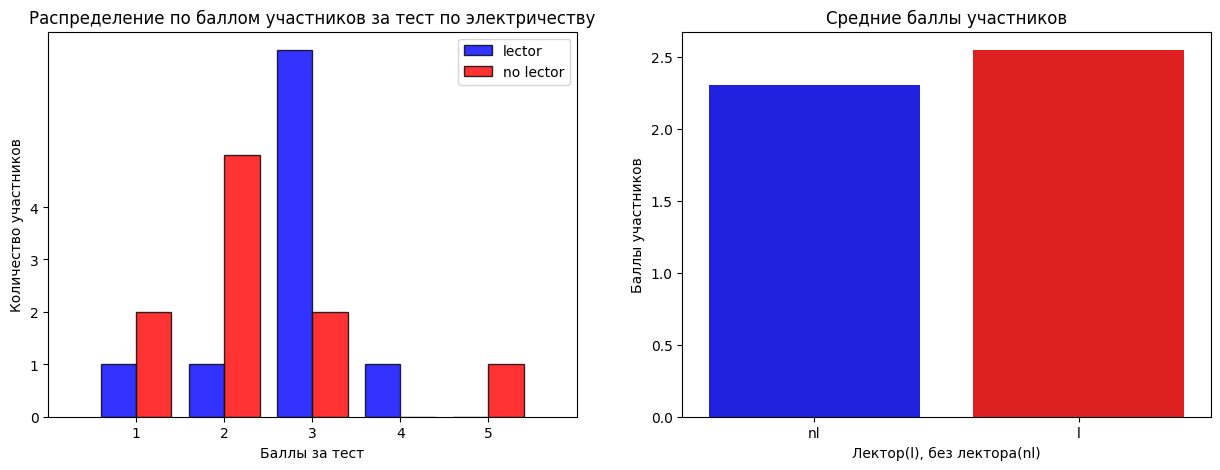

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist([df[df.lector_flag=='l'].points, df[df.lector_flag=='nl'].points], 
        edgecolor='black', color=['b', 'r'], 
        label=['lector', 'no lector'],alpha=0.8, bins=range(1, 7), align='left')
plt.xticks(range(1, 6))
plt.yticks(range(0, 5))
plt.xlim([0, 6])
plt.legend(loc='upper right')
plt.title('Распределение по баллом участников за тест по электричеству')
plt.ylabel('Количество участников')
plt.xlabel('Баллы за тест')

plt.subplot(1, 2, 2)
sns.barplot(data=df, x='lector_flag', y=df.points, errorbar=None, palette = ['b', 'r'])
plt.title("Средние баллы участников")
plt.ylabel("Баллы участников")
plt.xlabel("Лектор(l), без лектора(nl)")

Text(0.5, 0, 'Лектор(l), без лектора(nl)')

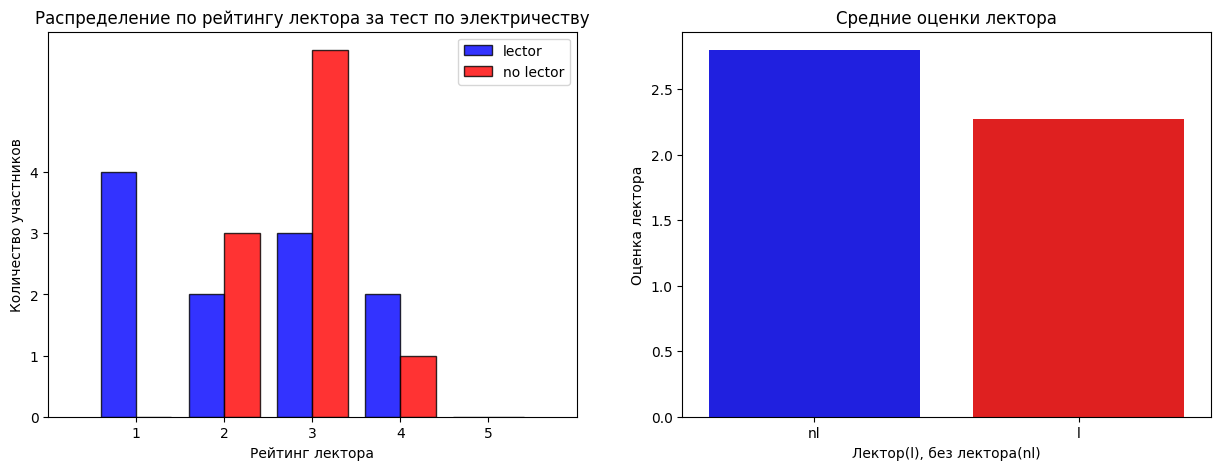

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist([df[df.lector_flag=='l'].Lector_rate, df[df.lector_flag=='nl'].Lector_rate], 
        edgecolor='black', color=['b', 'r'], 
        label=['lector', 'no lector'],alpha=0.8, bins=range(1, 7), align='left')
plt.xticks(range(1, 6))
plt.yticks(range(0, 5))
plt.xlim([0, 6])
plt.legend(loc='upper right')
plt.title('Распределение по рейтингу лектора за тест по электричеству')
plt.ylabel('Количество участников')
plt.xlabel('Рейтинг лектора')

plt.subplot(1, 2, 2)
sns.barplot(data=df, x='lector_flag', y=df.Lector_rate, errorbar=None, palette = ['b', 'r'])
plt.title("Средние оценки лектора")
plt.ylabel("Оценка лектора")
plt.xlabel("Лектор(l), без лектора(nl)")

Text(0.5, 0, 'Лектор(l), без лектора(nl)')

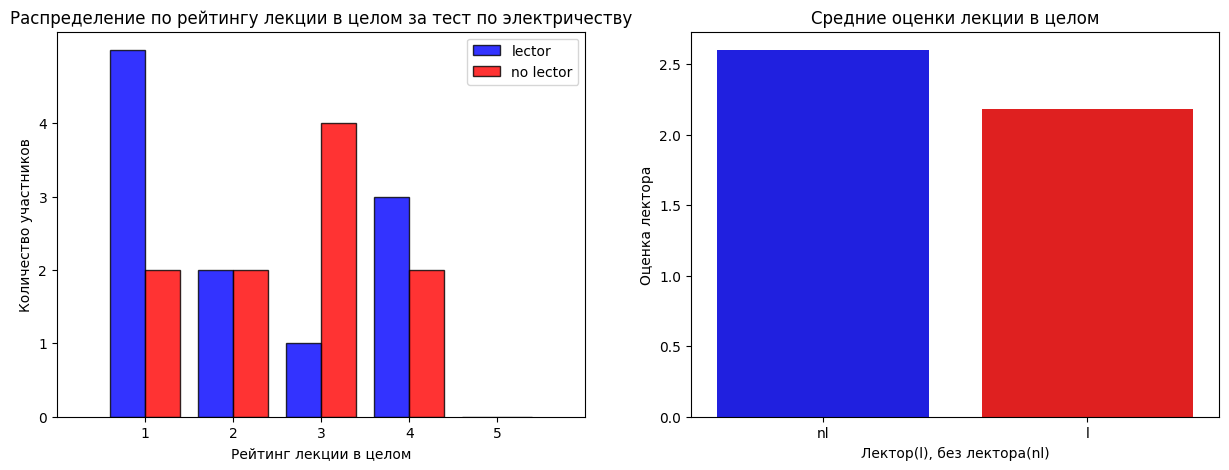

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist([df[df.lector_flag=='l'].General_rate, df[df.lector_flag=='nl'].General_rate], 
        edgecolor='black', color=['b', 'r'], 
        label=['lector', 'no lector'],alpha=0.8, bins=range(1, 7), align='left')
plt.xticks(range(1, 6))
plt.yticks(range(0, 5))
plt.xlim([0, 6])
plt.legend(loc='upper right')
plt.title('Распределение по рейтингу лекции в целом за тест по электричеству')
plt.ylabel('Количество участников')
plt.xlabel('Рейтинг лекции в целом')

plt.subplot(1, 2, 2)
sns.barplot(data=df, x='lector_flag', y=df.General_rate, errorbar=None, palette = ['b', 'r'])
plt.title("Средние оценки лекции в целом")
plt.ylabel("Оценка лектора")
plt.xlabel("Лектор(l), без лектора(nl)")

Text(0.5, 0, 'Лектор(l), без лектора(nl)')

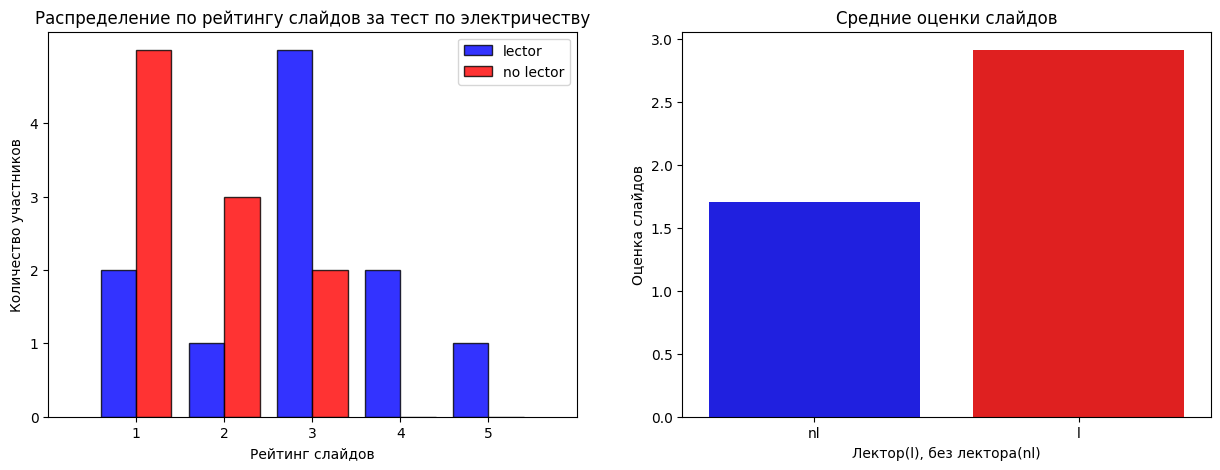

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist([df[df.lector_flag=='l'].Slide_rate, df[df.lector_flag=='nl'].Slide_rate], 
        edgecolor='black', color=['b', 'r'], 
        label=['lector', 'no lector'],alpha=0.8, bins=range(1, 7), align='left')
plt.xticks(range(1, 6))
plt.yticks(range(0, 5))
plt.xlim([0, 6])
plt.legend(loc='upper right')
plt.title('Распределение по рейтингу слайдов за тест по электричеству')
plt.ylabel('Количество участников')
plt.xlabel('Рейтинг слайдов')

plt.subplot(1, 2, 2)
sns.barplot(data=df, x='lector_flag', y=df.Slide_rate, errorbar=None, palette = ['b', 'r'])
plt.title("Средние оценки слайдов")
plt.ylabel("Оценка слайдов")
plt.xlabel("Лектор(l), без лектора(nl)")

In [75]:
df.drop(columns='Q1_blocks').corr()

,points,Lector_rate,Slide_rate,General_rate
points,1.000000,-0.305289,-0.037248,-0.090012
Lector_rate,-0.305289,1.000000,0.269689,0.669878
Slide_rate,-0.037248,0.269689,1.000000,0.428104
General_rate,-0.090012,0.669878,0.428104,1.000000


In [53]:
df[df.lector_flag=='nl'].drop(columns='Q1_blocks').corr()

,points,Lector_rate,Slide_rate,Оцените лекцию в целом,General_rate
points,1.000000,0.090909,0.453949,0.463547,NaN
Lector_rate,0.090909,1.000000,0.298753,0.522976,NaN
Slide_rate,0.453949,0.298753,1.000000,0.728193,NaN
Оцените лекцию в целом,0.463547,0.522976,0.728193,1.000000,NaN
General_rate,NaN,NaN,NaN,NaN,NaN


In [38]:
cor_l = df_lect[df_lect.lector_flag=='l'].drop(columns='Q1_blocks').corr()

In [39]:
from google.colab import files
cor_l.to_csv('example_file.csv')
files.download('example_file.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>